In [1]:
import jieba
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("training.csv")
data.head()

,2,合晟资产是一家专注于股票、债券等二级市场投资，为合格投资者提供专业资产管理服务的企业。公司业务范围包括资产管理、投资咨询和投资顾问服务。公司管理的私募基金产品主要包括股票型、债券型资产管理计划或证券投资基金，管理总资产规模80亿元左右。根据中国证券投资基金业协会数据，公司管理的私募证券投资基金（顾问管理）类规模较大，公司管理规模处于50亿元以上的第一梯队。
0,2,公司的主营业务为向中小微企业、个体工商户、农户等客户提供贷款服务，自设立以来主营业务未发生过变化。
1,1,公司立足于商业地产服务，致力于为商业地产开发、销售、运营全产业链提供一整套增值服务，业务覆盖...
2,2,公司经工商管理部门核准的经营范围为“投资咨询、经济信息咨询，企业管理咨询，品牌推广策划，公共...
3,2,该公司的主营业务为在中国境内(港、澳、台除外)开展保险代理销售，依托于自身的产品研究能力和专...
4,1,公司主营业务为地铁商业物业的租赁与运营管理服务。公司以整体租赁的方式取得轨道交通站点附属建筑...


In [3]:
data.columns = ["category", "content"]
data.head()

,category,content
0,2,公司的主营业务为向中小微企业、个体工商户、农户等客户提供贷款服务，自设立以来主营业务未发生过变化。
1,1,公司立足于商业地产服务，致力于为商业地产开发、销售、运营全产业链提供一整套增值服务，业务覆盖...
2,2,公司经工商管理部门核准的经营范围为“投资咨询、经济信息咨询，企业管理咨询，品牌推广策划，公共...
3,2,该公司的主营业务为在中国境内(港、澳、台除外)开展保险代理销售，依托于自身的产品研究能力和专...
4,1,公司主营业务为地铁商业物业的租赁与运营管理服务。公司以整体租赁的方式取得轨道交通站点附属建筑...


# 数据探索

In [4]:
category_list = list(set(data["category"]))
category_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [5]:
category_num = []
for i in category_list:
    category_num.append(data[data.category==i]["category"].count())
category_num

[54, 97, 1271, 1268, 227, 810, 303, 206, 163, 278, 96]

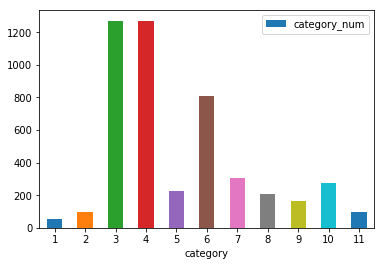

In [6]:
df = pd.DataFrame({"category":category_list, "category_num":category_num})
df.plot.bar(x="category", y="category_num", rot=0)

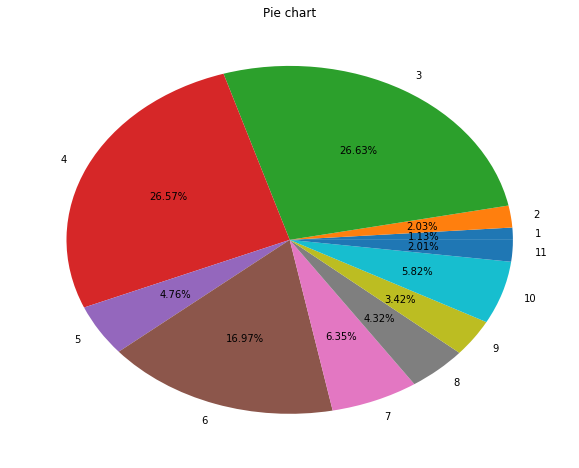

In [7]:
import matplotlib.mlab as mlab
fig = plt.figure(figsize=(10, 8))
plt.pie(category_num, labels=category_list, autopct="%1.2f%%")
plt.title("Pie chart")
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 2 columns):
category    4773 non-null int64
content     4773 non-null object
dtypes: int64(1), object(1)
memory usage: 74.7+ KB


### 无缺值

# 分词

## 调整词频

In [9]:
jieba.load_userdict("现代汉语补充词库1.txt")
fp = open("现代汉语补充词库1.txt", "r", encoding="utf8")
for line in fp:
    line = line.strip()
    jieba.suggest_freq(line, tune=True)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.791 seconds.
Prefix dict has been built succesfully.


## 加停用词

In [10]:
content = data.content.values.tolist()
print(content[1000])

公司是一家集土工类新型高分子合成材料的研发、生产及销售于一体的大型综合企业，产品包括土工织物类、土工膜类、复合材料类、特种土工材料、过滤材料类等12大系列、上百个品种，广泛应用于水利水电（水库防渗、河道生态治理、海堤护坝等）、交通（高铁、地铁、公路、桥梁、机场、港口航道等）、环保（垃圾填埋、污水处理、PM2.5治理、土壤修复、防沙固沙、矿山防渗、矿山掩埋等）、市政工程（海绵城市建设、地下管廊建设、生态水系等）、建筑（房屋防渗、保温节能等）等领域。


In [11]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != "\r\n":
        content_S.append(current_segment)

In [12]:
data_content = pd.DataFrame({"content_S":content_S})
data_content.head()

,content_S
0,"[公司, 的, 主营业务, 为, 向, 中小, 微, 企业, 、, 个体, 工商户, 、, ..."
1,"[公司, 立足于, 商业地产, 服务, ，, 致力于, 为, 商业地产, 开发, 、, 销售..."
2,"[公司, 经, 工商管理, 部门, 核准, 的, 经营范围, 为, “, 投资, 咨询, 、..."
3,"[该, 公司, 的, 主营业务, 为, 在, 中国, 境内, (, 港, 、, 澳, 、, ..."
4,"[公司, 主营业务, 为, 地铁, 商业, 物业, 的, 租赁, 与, 运营, 管理, 服务..."


In [13]:
stopwords = pd.read_csv("./stopwords_1.txt", index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8') 

In [14]:
"""
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != "\r\n":
        content_S.append(current_segment)
"""
# def preprocess_text(content_lines, sentences):
#     for line in content_lines:
#             segs = jieba.lcut(line)
#             segs = filter(lambda x:len(x)>1, segs)
#             segs = filter(lambda x:x not in stopwords, segs)
#             # 构成元组[('个体 工商户 农户 贷款 设立 变化', '1'),[("nong han")]]
#             sentences.append(" ".join(segs))
# # 生成训练数据
# sentences = []
# preprocess_text(data_content, sentences)
# sentences
def drop_stopwords(contents, stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean, all_words

contents = data_content.content_S.values.tolist()
stopwords = stopwords.stopword.values.tolist()
contents_clean, all_words = drop_stopwords(contents, stopwords)

In [15]:
data_content = pd.DataFrame({"content_S":contents_clean})
sentences = data_content.values.tolist()
data_content = pd.DataFrame({"content_S":contents_clean})
data_content

,content_S
0,"[微, 个体, 工商户, 农户, 贷款, 设立, 变化]"
1,"[立足于, 商业地产, 商业地产, 全, 产业链, 一整套, 增值, 覆盖, 商业, 定位,..."
2,"[工商管理, 部门, 核准, 经营范围, 投资, 咨询, 经济, 信息, 咨询, 咨询, 品..."
3,"[中国, 境内, 港, 澳, 台, 保险代理, 依托, 研究, 能力, 专业化, 能力, 团..."
4,"[地铁, 商业, 物业, 租赁, 整体, 租赁, 方式, 轨道交通, 站点, 附属, 建筑物..."
5,"[位于, 南京市, 江宁区, 小额, 信贷, 融资, 服务供应商, 专注, 微, 个体经营者..."
6,"[商业, 地产商, 内容, 项目前期, 市场调研, 中期, 招商, 营销策划, 营销, 代理..."
7,"[青岛, 拥湾, 资产, 集团股份, 有限公司, 简称, 拥湾, 资产, 股票代码, 834..."
8,"[物业管理, 发生变化, 元, 元及, 元, 占, 营业, 比例, 超过, 传统, 物业管理..."
9,"[物业管理, 家政, 洗染, 建筑, 清洁, 摄影, 扩印, 房地产, 居间, 房地产, 代..."


In [16]:
# 本次项目的词表
data_all_words = pd.DataFrame({"all_words":all_words})
data_all_words.head()

,all_words
0,微
1,个体
2,工商户
3,农户
4,贷款


In [17]:
data_all_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310460 entries, 0 to 310459
Data columns (total 1 columns):
all_words    310460 non-null object
dtypes: object(1)
memory usage: 2.4+ MB


In [18]:
import numpy
#words_count = data_all_words.groupby(by=["all_words"])["all_words"].agg({"count":numpy.size})
#words_count = words_count.reset_index.sort_values(by=["count"], ascending=False)
#words_count.head()

words_count=data_all_words.groupby(by=["all_words"])["all_words"].agg({"count":numpy.size})
words_count=words_count.reset_index().sort_values(by=["count"], ascending=False)
words_count.head()

/home/shnu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,all_words,count
7133,互联网,1380
29784,软件,1145
21091,汽车,1019
17445,报告,996
6326,中国,993


/home/shnu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


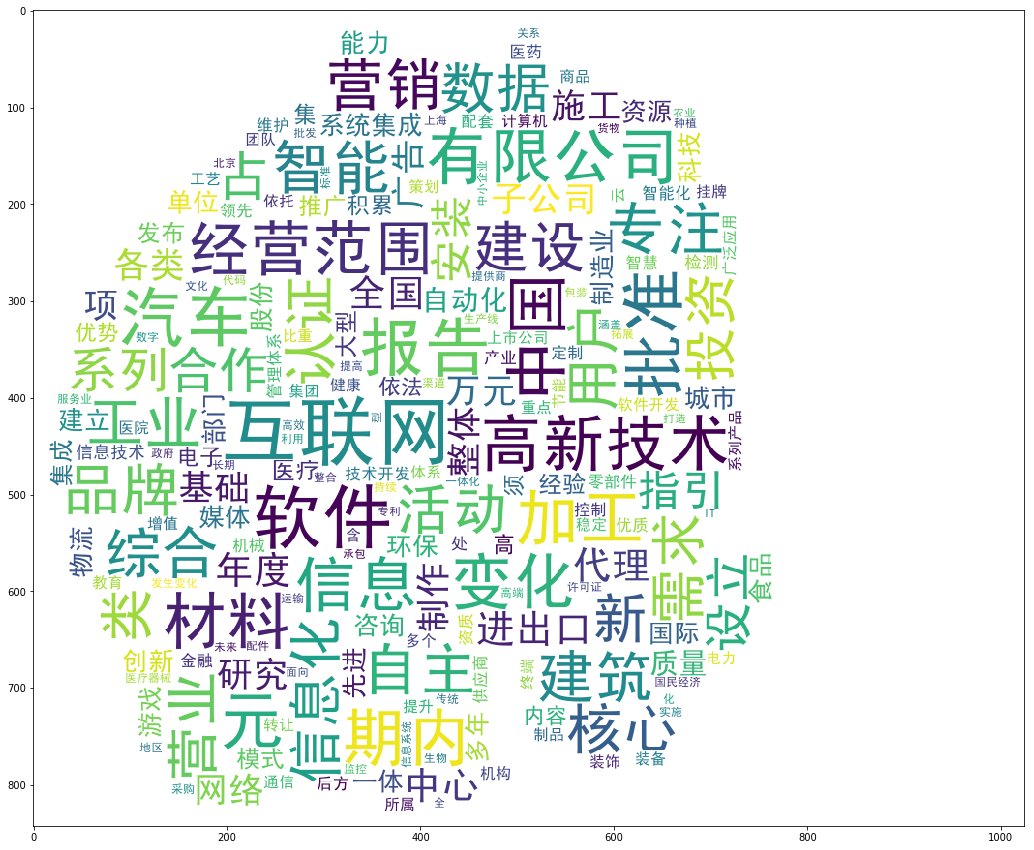

In [19]:
from scipy.misc import imread
from wordcloud import WordCloud, ImageColorGenerator
bimg = imread("./timg.jpeg")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20.0, 15.0)
wordcloud = WordCloud(font_path="simhei.ttf", background_color="white",mask=bimg, max_font_size=80)
# 取前面的100的词，构成字典
word_frequence = {x[0]:x[1] for x in words_count.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

# TF-IDF:提取关键词

In [20]:
import jieba.analyse
index = 2410
print(data["content"][index])
content_S_str = "".join(content_S[index])
print(" ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))

公司通过将水渣经过立磨系统加工处理为矿渣粉,做为优质的混凝土掺合料进行销售。公司产品广泛应用于建筑工程、钢铁产业等领域。
掺合料 水渣 立磨 矿渣 钢铁产业


## LDA:主题模型

In [21]:
from gensim import corpora, models, similarities
import gensim
# 做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=11) #类似Kmeans自己指定K

In [22]:
print(lda.print_topic(10, topn=5))

0.016*"汽车" + 0.006*"零部件" + 0.006*"有限公司" + 0.006*"园林绿化" + 0.005*"环保"


In [23]:
for topic in lda.print_topics(num_topics=11, num_words=5):
    print(topic[1])

0.012*"制作" + 0.008*"媒体" + 0.008*"发行" + 0.007*"代理" + 0.007*"文化"
0.012*"数据" + 0.009*"互联网" + 0.009*"游戏" + 0.008*"用户" + 0.005*"网络"
0.012*"批准" + 0.011*"经营范围" + 0.011*"进出口" + 0.008*"安装" + 0.007*"元"
0.007*"加工" + 0.007*"认证" + 0.006*"万元" + 0.006*"元" + 0.005*"质量"
0.010*"加工" + 0.008*"种植" + 0.005*"农业" + 0.004*"种子" + 0.004*"品种"
0.009*"指引" + 0.009*"互联网" + 0.006*"制造业" + 0.006*"全国" + 0.005*"软件"
0.022*"建筑" + 0.012*"施工" + 0.008*"装饰" + 0.007*"材料" + 0.007*"动漫"
0.013*"汽车" + 0.009*"自动化" + 0.006*"工业" + 0.005*"制造业" + 0.004*"高新技术"
0.008*"互联网" + 0.007*"中国" + 0.007*"营销" + 0.007*"有限公司" + 0.006*"物流"
0.010*"智能" + 0.007*"信息化" + 0.007*"项" + 0.006*"高新技术" + 0.005*"信息安全"
0.016*"汽车" + 0.006*"零部件" + 0.006*"有限公司" + 0.006*"园林绿化" + 0.005*"环保"


In [24]:
data_train = pd.DataFrame({"contents_clean":contents_clean, "label":data["category"]})
data_train.head()

,contents_clean,label
0,"[微, 个体, 工商户, 农户, 贷款, 设立, 变化]",2
1,"[立足于, 商业地产, 商业地产, 全, 产业链, 一整套, 增值, 覆盖, 商业, 定位,...",1
2,"[工商管理, 部门, 核准, 经营范围, 投资, 咨询, 经济, 信息, 咨询, 咨询, 品...",2
3,"[中国, 境内, 港, 澳, 台, 保险代理, 依托, 研究, 能力, 专业化, 能力, 团...",2
4,"[地铁, 商业, 物业, 租赁, 整体, 租赁, 方式, 轨道交通, 站点, 附属, 建筑物...",1


In [25]:
x_data_train = data_train["contents_clean"]
y_data_train = data_train["label"]

In [26]:
# list转为string
words = []
for line_index in range(len(x_data_train)):
    try:
        words.append(" ".join(x_data_train[line_index]))
    except:
        print(line_index, word_index)
words[0]

'微 个体 工商户 农户 贷款 设立 变化'

# 根据词频做词向量

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer="word", max_features=20000, lowercase=False, ngram_range=(1,3))
vec.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [28]:
print(vec.get_feature_names())
print(len(vec.get_feature_names()))

['00', '00 万元', '000', '000 00', '002', '004', '008', '01', '014', '02', '02 万元', '022', '028', '03', '04', '04 万元', '046', '05', '058', '06', '060', '069', '07', '07 万元', '075', '08', '08 万元', '089', '09', '09 万元', '090', '096', '098', '099', '10', '10 万元', '10 子公司', '100', '100 100', '100 100 100', '100 100 近两年', '100 99', '100 变化', '100 报告', '100 报告 期内', '100 来源于', '100 设立', '100 设立 变化', '100 近两年', '100 近两年 变化', '1000', '10000', '101', '103', '104', '106', '107', '108', '109', '10KV', '10kV', '10kV 35kV', '11', '11 万元', '110', '110KV', '111', '111010', '11101014', '11101410', '112', '113', '114', '115', '116', '117', '118', '12', '12 万元', '120', '1200', '12000', '121', '1210', '121013', '12101310', '121015', '12101511', '12101511 工业', '12101511 工业 机械', '124', '125', '126', '127', '129', '13', '13 万元', '130', '13101010', '13131010', '132', '134', '135', '136', '137', '138', '139', '14', '14 万元', '140', '144', '146', '15', '15 万元', '150', '1500', '15000', '152', '153', '156', '159', '

## K近邻

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(neigh, vec.transform(words), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

/home/shnu/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.5665862804753322


## 贝叶斯

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score
classifier = MultinomialNB(alpha=0.8)
scores = cross_val_score(classifier, vec.transform(words), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

0.85646510059286


## SVM

In [31]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
clf = SVC(kernel='linear',C=0.2)
scores = cross_val_score(clf, vec.transform(words), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

0.8120388267406191


## 随机森林

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
tree_param_grid = { "n_estimators":[700], "max_depth": [170, 190, 210, 230, 250]}
grid = GridSearchCV(RandomForestClassifier(),param_grid=tree_param_grid, cv=11)
grid.fit(vec.transform(words), y_data_train)
grid.grid_scores_, grid.best_params_, grid.best_score_

/home/shnu/.local/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: 0.80620, std: 0.02543, params: {'max_depth': 170, 'n_estimators': 700},
  mean: 0.80578, std: 0.02188, params: {'max_depth': 190, 'n_estimators': 700},
  mean: 0.80662, std: 0.02250, params: {'max_depth': 210, 'n_estimators': 700},
  mean: 0.80369, std: 0.02385, params: {'max_depth': 230, 'n_estimators': 700},
  mean: 0.80536, std: 0.02092, params: {'max_depth': 250, 'n_estimators': 700}],
 {'max_depth': 210, 'n_estimators': 700},
 0.8066205740624345)

## 神经网络

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import cross_val_score
mlp = MLPClassifier(momentum=0.1)
scores = cross_val_score(mlp, vec.transform(words), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

0.8476403876217659


## TFidf

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer="word", max_features=20000, lowercase = False, ngram_range=(1,2))
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## K近邻

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(vectorizer.transform(words), y_data_train)
scores = cross_val_score(neigh, vectorizer.transform(words), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

0.8214276936138247


## 高斯贝叶斯

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
scores = cross_val_score(classifier, vectorizer.transform(words).toarray(), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

0.7628690474531847


In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score
classifier = MultinomialNB(alpha=0.8)
scores = cross_val_score(classifier, vectorizer.transform(words).toarray(), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

0.7066688694895352


## SVM

In [38]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
clf = SVC(kernel='linear',C=1.6)
scores = cross_val_score(clf, vectorizer.transform(words), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

0.8522616792609224


## 神经网络

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import cross_val_score
mlp = MLPClassifier(momentum=0.1)
scores = cross_val_score(mlp, vectorizer.transform(words), y_data_train, cv = 11, scoring = 'accuracy')
print(scores.mean())

0.8600358941066054


## 随机森林

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
rf = RandomForestClassifier()
param = {"n_estimators":[700], "max_depth": [140,160, 180,200,220]}

# 网格搜索
gc = GridSearchCV(rf, param_grid=param, cv=11) 
gc.fit(vectorizer.transform(words), y_data_train)
gc.grid_scores_, gc.best_params_, gc.best_score_

([mean: 0.80557, std: 0.02010, params: {'max_depth': 140, 'n_estimators': 700},
  mean: 0.81018, std: 0.01888, params: {'max_depth': 160, 'n_estimators': 700},
  mean: 0.80851, std: 0.02256, params: {'max_depth': 180, 'n_estimators': 700},
  mean: 0.80872, std: 0.01917, params: {'max_depth': 200, 'n_estimators': 700},
  mean: 0.80830, std: 0.01985, params: {'max_depth': 220, 'n_estimators': 700}],
 {'max_depth': 160, 'n_estimators': 700},
 0.8101822752985544)